# Task: To build a simple Linear regression model to predict the corrected porosity of core samples

## Outline

1. Import neccessary libraries
2. Load the datasets (core sample data)
3. Exploratory Analysis
    * Get overview of the dataset
    * Handle Missing values and duplicates
    * Treat Outliers
    * Handle other errors
4. Perform statistical anaylsis on the data
    * Get the statistical parameters 
    * Perform univarite analysis and plots
    * Perform bivariate analysis and plots
    * Check for data correlation
5. Data Preparation
    * Get the dependent and independent variation
    * Split the dataset into train and test data
    * Scale the dataset (train data)
6. Modeling
    * LinearRegression from linear_models
    * Make predictions on your test data
    * Evaluate the performance of the model trained
7. Conclusion and Remark.

1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

2. Load the dataset

In [2]:
core_df = pd.read_csv('CleanedUpCoreData.csv')

core_df.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
0,6432.5,6.67,4.15,38.6,0.0
1,6434.5,6.07,4.25,48.6,6.2
2,6436.5,4.91,3.40,41.0,2.5
3,6438.5,6.00,0.39,4.6,66.4
4,6440.6,5.63,3.90,37.0,0.6


3. Exploratory Analysis

* Overview of the dataset

In [3]:
core_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depth              167 non-null    float64
 1   CorrectedPorosity  167 non-null    float64
 2   TOC                167 non-null    float64
 3   Quartz             167 non-null    float64
 4   Calcite            167 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


The core sample data comprises of 167 core samples (which are the observations) with 5 distinct features to examine the makeup of each core sample.

* Check for missing vaules and duplicates

In [4]:
core_df.isnull().sum()

Depth                0
CorrectedPorosity    0
TOC                  0
Quartz               0
Calcite              0
dtype: int64

There is no missing value in the core sample data

In [5]:
# checking for duplicates
core_df.duplicated().sum()

0

There is no duplicate in the core sample data

* Checking for outliners

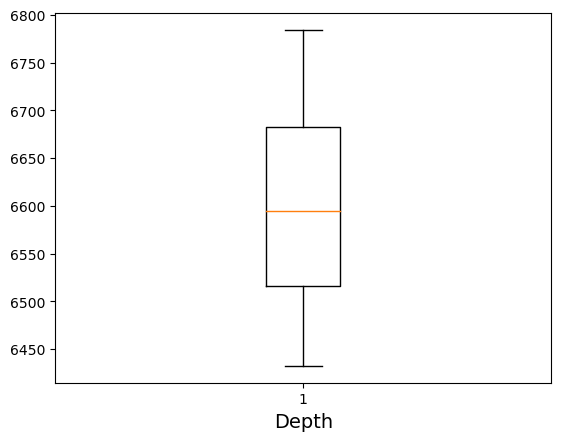

In [6]:
plt.boxplot(x="Depth", data=core_df)
plt.xlabel("Depth", fontsize=14)
plt.show()

In [7]:
columns = [c for c in core_df.columns]
columns

['Depth', 'CorrectedPorosity', 'TOC', 'Quartz', 'Calcite']

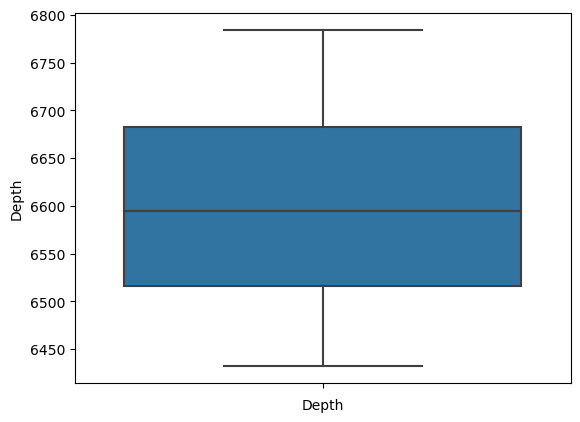

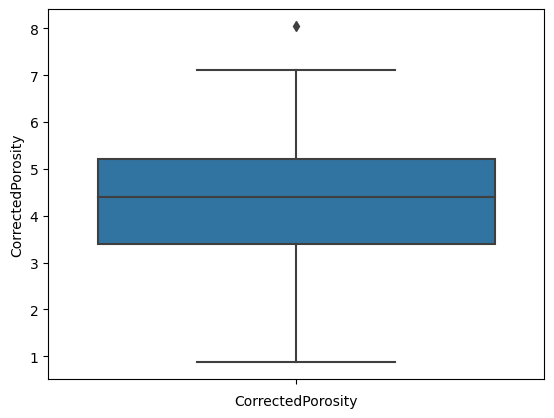

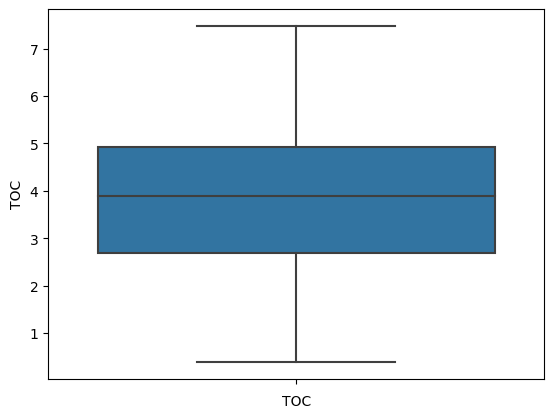

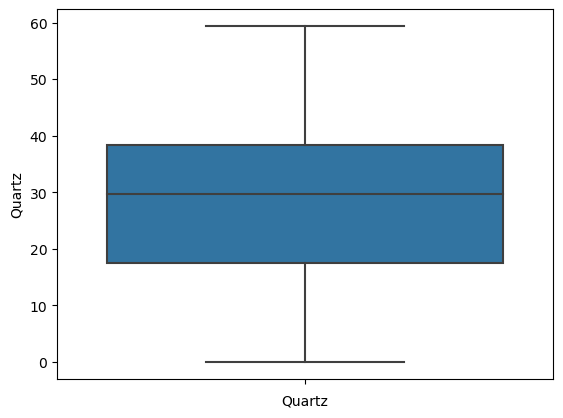

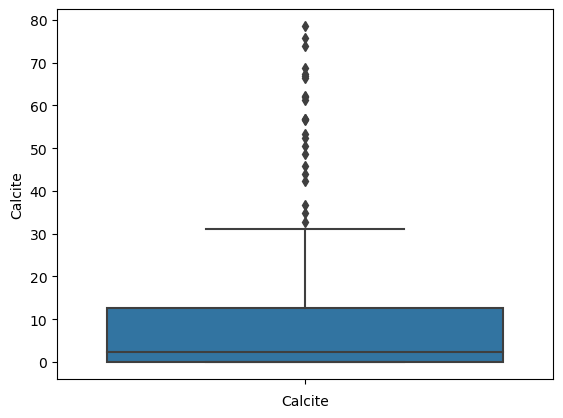

In [8]:
def boxplot(data):
    columns = [c for c in data.columns]
    for col in columns:
        sns.boxplot(y=col, data=data)
        plt.xlabel(col)
        plt.show()
        
boxplot(core_df)

* Handling other errors

In [9]:
core_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depth              167 non-null    float64
 1   CorrectedPorosity  167 non-null    float64
 2   TOC                167 non-null    float64
 3   Quartz             167 non-null    float64
 4   Calcite            167 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


In [10]:
core_df.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
0,6432.5,6.67,4.15,38.6,0.0
1,6434.5,6.07,4.25,48.6,6.2
2,6436.5,4.91,3.40,41.0,2.5
3,6438.5,6.00,0.39,4.6,66.4
4,6440.6,5.63,3.90,37.0,0.6


In [11]:
core_df.tail()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
162,6773.9,3.77,2.06,26.7,15.4
163,6775.1,4.60,3.52,31.0,0.0
164,6780.6,4.16,2.47,16.0,8.7
165,6782.2,2.49,2.32,24.8,19.8
166,6784.3,2.99,3.66,20.2,11.9


4. Perform statistical analysis on the data

* Get the statistical parameters

In [12]:
# To get the statistical parameters, we make use of the .describe function

core_df.describe()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6599.828144,4.262934,3.770778,27.963473,12.122156
std,99.953163,1.349560,1.625806,13.875863,19.819573
min,6432.500000,0.880000,0.390000,0.000000,0.000000
25%,6516.150000,3.405000,2.680000,17.450000,0.000000
50%,6594.600000,4.390000,3.900000,29.700000,2.400000
75%,6683.000000,5.205000,4.915000,38.300000,12.700000
max,6784.300000,8.050000,7.480000,59.400000,78.600000


* Perform univariate analysis

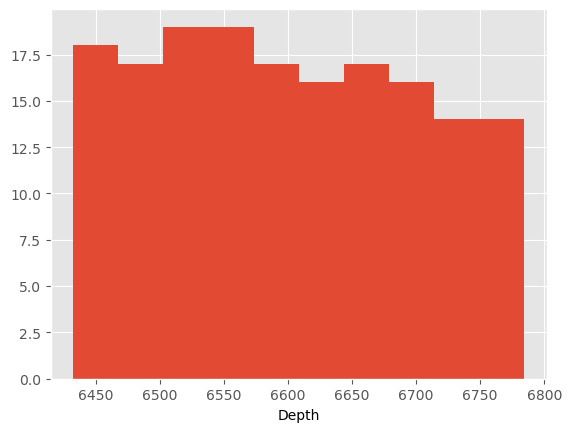

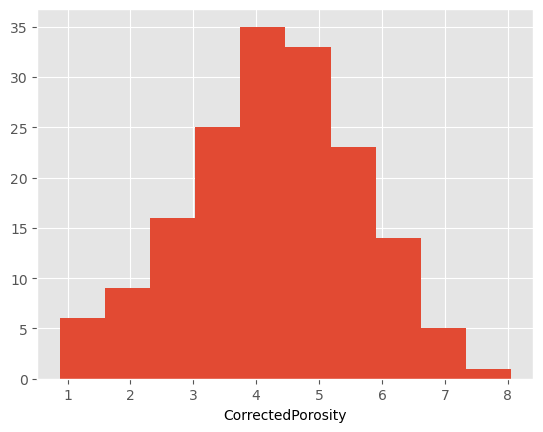

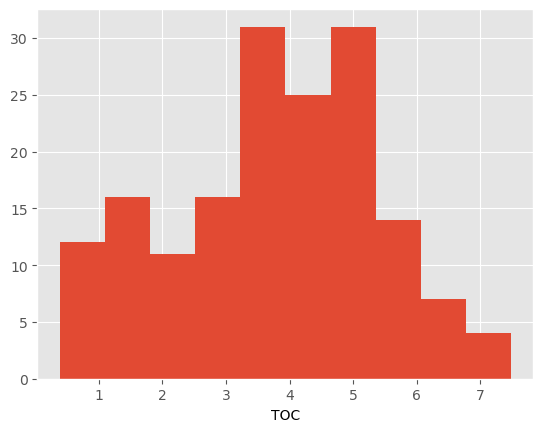

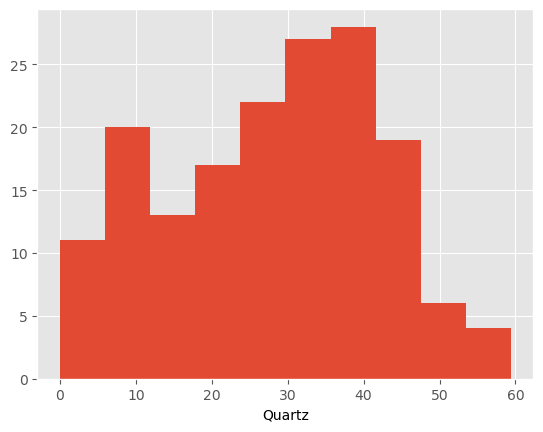

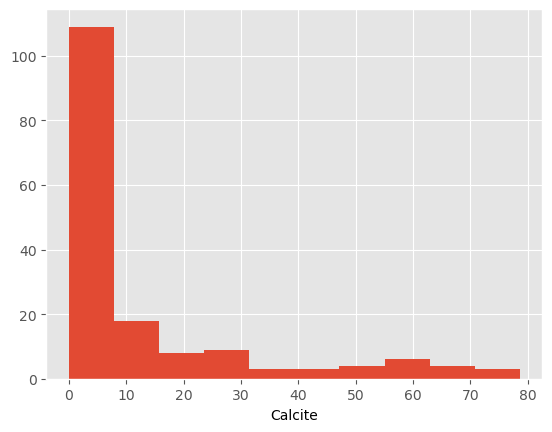

In [13]:
def univariate(data):
    columns = [c for c in data.columns]
    plt.style.use("ggplot")
    for col in columns:
        plt.hist(col, data=data)
        plt.xlabel(col)
        plt.show()
univariate(core_df)

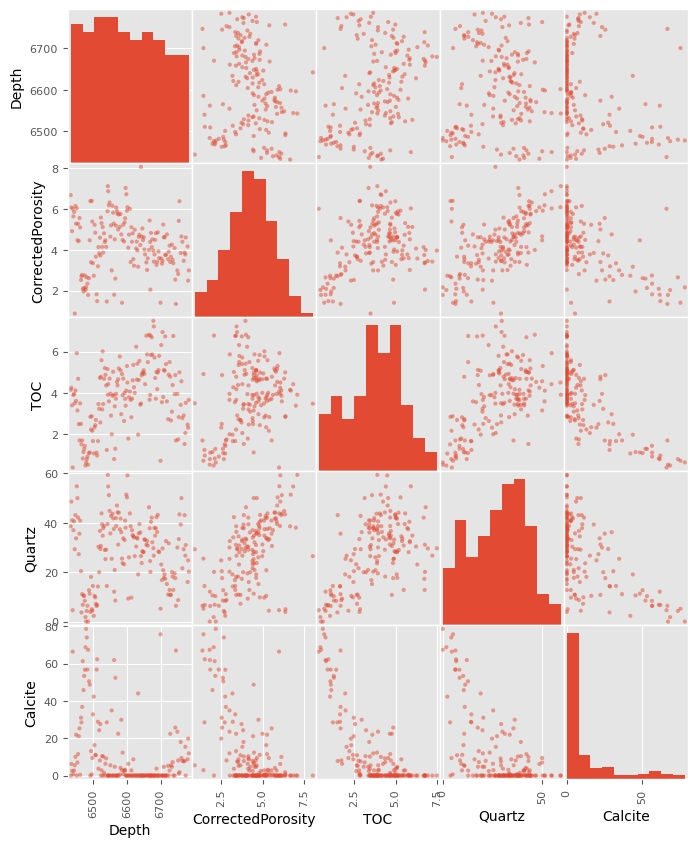

In [14]:
def bivariate(data):
    #scatter_matrix
    scatter_matrix(data, figsize=(8, 10))
    plt.show()

bivariate(core_df)

* Check for data correlation

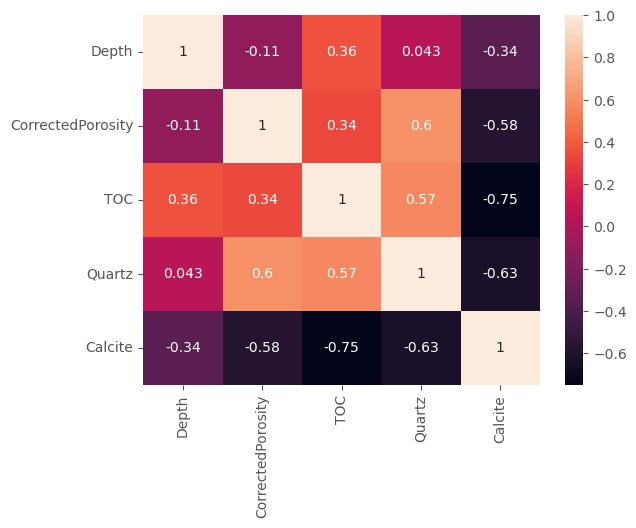

In [15]:
sns.heatmap(core_df.corr(), annot=True)
plt.show()

5. Data Preparation

* Get the dependent and independent variation

In [16]:
core_df.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
0,6432.5,6.67,4.15,38.6,0.0
1,6434.5,6.07,4.25,48.6,6.2
2,6436.5,4.91,3.40,41.0,2.5
3,6438.5,6.00,0.39,4.6,66.4
4,6440.6,5.63,3.90,37.0,0.6


In [17]:
# Geting the independent (Input)
X = core_df.iloc[:, [0, 2, 3, 4]]
X.head()

,Depth,TOC,Quartz,Calcite
0,6432.5,4.15,38.6,0.0
1,6434.5,4.25,48.6,6.2
2,6436.5,3.40,41.0,2.5
3,6438.5,0.39,4.6,66.4
4,6440.6,3.90,37.0,0.6


In [18]:
# Getting the dependent variable
y = core_df.iloc[:, 1]
y.head()

0    6.67
1    6.07
2    4.91
3    6.00
4    5.63
Name: CorrectedPorosity, dtype: float64

* Scaling the train data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

* Split the dataset into train and test data

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [23]:
x_train.shape

(116, 4)

In [24]:
y_train.shape

(116,)

In [25]:
x_test.shape

(51, 4)

In [26]:
y_test.shape

(51,)

6. Modeling

 * LinearRegression from linear_models

In [27]:
# Import the sklearn library for LinearRegression models
from sklearn.linear_model import LinearRegression

# Create the LinearRegression Model Instance
lr_model = LinearRegression()

# Fit the data into the model
lr_model.fit(x_train, y_train)

LinearRegression()

* Make predictions on your test data

In [28]:
# Make prediction
lr_model_pred = lr_model.predict(x_test)

* Evaluate the performance of the model trained

In [29]:
# Evaluating the performance of our model on train data
lr_model.score(x_train, y_train)

0.5179898616087704

In [30]:
# Evaluating the performance of our model on test data
lr_model.score(x_test, y_test)

0.5290243288046854

In [31]:
# using the sklearn evaluation metric

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Accuracy: {}".format(r2_score(lr_model_pred, y_test)))
print()
print("MAE: {}".format(mean_absolute_error(lr_model_pred, y_test)))
print()
print("MSE: {}".format(mean_squared_error(lr_model_pred, y_test)))

Accuracy: -0.09136608492106801

MAE: 0.7083879240679585

MSE: 1.029326220172237


In [32]:
lr_model_pred

array([2.90560241, 4.38609912, 4.41794744, 5.98295817, 4.3863139 ,
       4.34398041, 4.52916408, 4.75650634, 4.87938198, 4.36280447,
       3.21853445, 3.90142989, 3.9547491 , 4.45582943, 1.99533604,
       4.34275747, 1.19910626, 4.79114156, 3.97411731, 3.57127722,
       4.93851576, 2.57504085, 4.5761656 , 5.90679937, 3.85645886,
       4.84304354, 4.05607644, 4.92024799, 5.13766386, 3.85327004,
       4.44099143, 3.84554109, 4.57881342, 3.53831904, 4.46344431,
       5.68425395, 4.58453439, 4.74107933, 2.55435826, 4.11622212,
       4.93915639, 2.09841678, 4.2516755 , 5.48299354, 4.77465945,
       4.77961772, 4.15096629, 3.81025642, 2.14365416, 4.62971126,
       3.99556274])

In [33]:
y_test

101    3.17
108    4.47
78     1.41
56     7.11
98     4.06
29     6.38
105    8.05
82     5.34
104    4.23
109    4.61
19     1.96
42     3.82
15     2.52
67     4.51
24     2.65
31     6.39
132    1.41
51     4.38
160    3.46
16     2.70
76     5.75
18     2.09
12     4.42
9      6.02
133    3.57
75     5.12
136    5.23
60     4.64
55     5.88
147    4.25
30     3.39
141    4.75
120    4.13
148    3.51
158    4.65
2      4.91
100    3.97
126    4.81
68     2.59
131    3.59
45     5.57
26     1.79
143    3.90
85     6.71
96     3.22
94     4.80
36     4.83
118    2.05
22     2.03
119    4.82
135    3.45
Name: CorrectedPorosity, dtype: float64